# Assignment 2: Statistical Treatment for Retail Datasets

#### import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statistics
import scipy.stats
%matplotlib inline
from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform

In [2]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

#### import dataset and atribute description

In [3]:
file = 'nyc-rolling-sales.csv'
df_data = pd.read_csv(file, na_values={'n/a', 'na', '-'})

In [4]:
df_data.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
# checking columns of the data
df_data.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [6]:
# checking data shape
df_data.shape

(84548, 22)

In [7]:
# checking the data
df_data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [8]:
# checking null data
df_data.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

#### Data Cleaning

In [9]:
df_data.replace(' ',np.nan, inplace=True)
df_data.isna().sum() /len(df_data) *100

Unnamed: 0                          0.000000
BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                    0.000000
GROSS SQUARE FEET                   0.000000
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                          0.000000
SALE DATE                           0.000000
dtype: flo

In [10]:
df_data.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [11]:
df_data.isnull().sum()

Unnamed: 0                          0
BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              738
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         738
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

In [12]:
# Mengubah tipe data beberapa kolom
df_data['SALE DATE'] = pd.to_datetime(df_data['SALE DATE'], errors='coerce')
df_data['SALE PRICE'] = pd.to_numeric(df_data['SALE PRICE'], errors='coerce')
df_data['LAND SQUARE FEET'] = pd.to_numeric(df_data['LAND SQUARE FEET'], errors='coerce')
df_data['GROSS SQUARE FEET']= pd.to_numeric(df_data['GROSS SQUARE FEET'], errors='coerce')
df_data['TAX CLASS AT TIME OF SALE'] = df_data['TAX CLASS AT TIME OF SALE'].astype('category')
df_data['TAX CLASS AT PRESENT'] = df_data['TAX CLASS AT PRESENT'].astype('category')

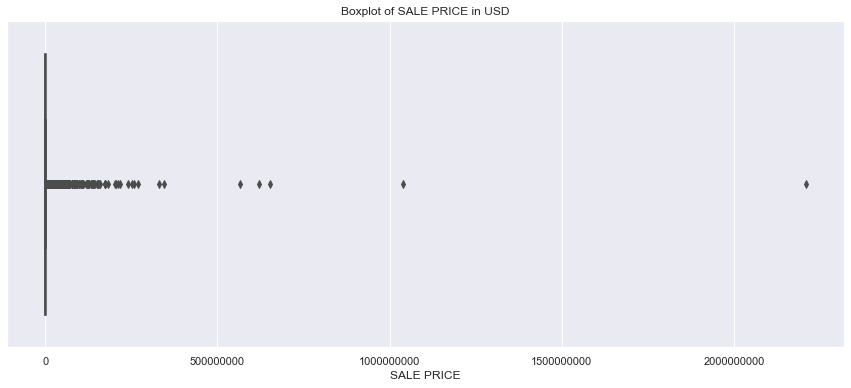

In [13]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df_data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [14]:
# Mengambil data SALE PRICE dalam rentang 100000 - 5000000
df_data = df_data[(df_data['SALE PRICE'] > 100000) & (df_data['SALE PRICE'] < 5000000)]

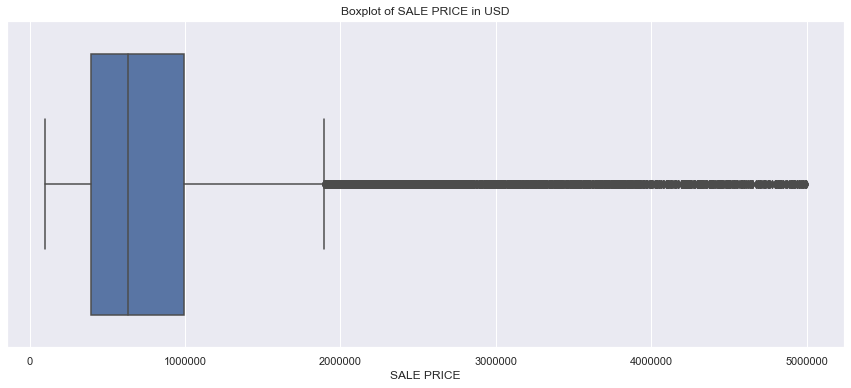

In [15]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df_data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [16]:
# duplicate dataframe
df = df_data.copy()

In [17]:
df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
6,10,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
13,17,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,NaN,NaN,1920,2,C6,499000.0,2017-03-10
15,19,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",10009,0,0,0,NaN,NaN,1920,2,C6,529500.0,2017-06-09
16,20,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 2E",10009,0,0,0,NaN,NaN,1920,2,C6,423000.0,2017-07-14


In [18]:
# Mencari kolom yang bertipe data object
categorical = [var for var in df.columns if df[var].dtype=='O']
categorical

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'BUILDING CLASS AT TIME OF SALE']

In [19]:
# Mengambil jumlah Total Units dalam rentang 0-50
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 50)]

In [20]:
# Menghapus data yang jika Commercial Units dan Residential Units dijumlahkan tidak sama dengan Total Units
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [21]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38656 entries, 3 to 84545
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      38656 non-null  int64         
 1   BOROUGH                         38656 non-null  object        
 2   NEIGHBORHOOD                    38656 non-null  object        
 3   BUILDING CLASS CATEGORY         38656 non-null  object        
 4   TAX CLASS AT PRESENT            38656 non-null  category      
 5   BLOCK                           38656 non-null  int64         
 6   LOT                             38656 non-null  int64         
 7   BUILDING CLASS AT PRESENT       38656 non-null  object        
 8   ADDRESS                         38656 non-null  object        
 9   ZIP CODE                        38656 non-null  int64         
 10  RESIDENTIAL UNITS               38656 non-null  int64         
 11  CO

In [23]:
# delete unnamed column
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [24]:
df.shape

(38656, 19)

Setelah dilakukan data cleaning, terdapat pengurangan jumlah data dari 84548 data menjadi 38586 data dengan jumlah kolom sebanyak 19. Data yang telah dibersihkan ini dapat digunakan dibandingkan dengan data sebelumnya yang  masih terdapat data null, missing value, data duplikat, dan lainnya yang jika tidak dilakukan pembersihan terlebih dahulu akan berpengaruh terhadap tingkat keakuratan data.

#### Measure of Cntral Tendency

##### Mean

In [25]:
mean_saleprice = statistics.mean(df['SALE PRICE'])
mean_lsf = statistics.mean(df['LAND SQUARE FEET'])
mean_gsf = statistics.mean(df['GROSS SQUARE FEET'])
print("Mean of Sale Price : ",mean_saleprice)
print("Mean of Land Square Feet : ",mean_lsf)
print("Mean of Gross Square Feet : ",mean_gsf)

Mean of Sale Price :  930737.933723096
Mean of Land Square Feet :  nan
Mean of Gross Square Feet :  nan


##### Median

In [26]:
median_saleprice = statistics.median(df['SALE PRICE'])
median_lsf = statistics.median(df['LAND SQUARE FEET'])
median_gsf = statistics.median(df['GROSS SQUARE FEET'])
print("Median of Sale Price : ",median_saleprice)
print("Median of Land Square Feet : ",median_lsf)
print("Median of Gross Square Feet : ",median_gsf)

Median of Sale Price :  686350.0
Median of Land Square Feet :  3226.5
Median of Gross Square Feet :  3675.0


##### Mode

In [27]:
mode_borough            = statistics.mode(df['BOROUGH'])
mode_Neighborhood       = statistics.mode(df['NEIGHBORHOOD'])
mode_TaxClassAtPresent = statistics.mode(df['TAX CLASS AT PRESENT'])
mode_BuildClassCategory       = statistics.mode(df['BUILDING CLASS CATEGORY'])
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Tax Class at Present            :" , mode_TaxClassAtPresent )
print("Mode Building Class Category         :" , mode_BuildClassCategory )

Mode Borough                         : Queens
Mode Neighborhood                    : FLUSHING-NORTH
Mode Tax Class at Present            : 1
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    


#### Measure of Spread

##### Range

In [28]:
range_saleprice = np.ptp(df['SALE PRICE'])
range_lsf = np.ptp(df['LAND SQUARE FEET'])
range_gsf = np.ptp(df['GROSS SQUARE FEET'])
print("Range of Sale Price : ",range_saleprice)
print("Range of Land Square Feet : ",range_lsf)
print("Range of Gross Square Feet : ",range_gsf)

Range of Sale Price :  4896141.0
Range of Land Square Feet :  nan
Range of Gross Square Feet :  nan


##### Variance

In [29]:
var_saleprice = statistics.variance(df['SALE PRICE'])
var_lsf = statistics.variance(df['LAND SQUARE FEET'])
var_gsf = statistics.variance(df['GROSS SQUARE FEET'])
print("Variance of Sale Price : ",var_saleprice)
print("Variance of Land Square Feet : ",var_lsf)
print("Variance of Gross Square Feet : ",var_gsf)

Variance of Sale Price :  609378435300.8617
Variance of Land Square Feet :  nan
Variance of Gross Square Feet :  nan


##### Standard Deviation

In [30]:
std_saleprice = statistics.stdev(df['SALE PRICE'])
std_lsf = statistics.stdev(df['LAND SQUARE FEET'])
std_gsf = statistics.stdev(df['GROSS SQUARE FEET'])
print("Standard Deviation of Sale Price : ",std_saleprice)
print("Standard Deviation of Land Square Feet : ",std_lsf)
print("Standard Deviation of Gross Square Feet : ",std_gsf)

Standard Deviation of Sale Price :  780626.9501502377
Standard Deviation of Land Square Feet :  nan
Standard Deviation of Gross Square Feet :  nan


##### Probability Distribution

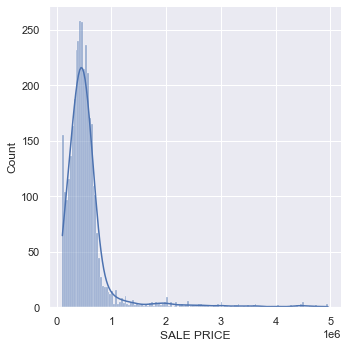

In [31]:
bronx_dist = df[df['BOROUGH'] == 'Bronx']['SALE PRICE']

ax = sns.displot(bronx_dist,
                  kde=True)

data sudah berdistribusi normal

#### Confidence Intervals

In [36]:
df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                       
                        mean           std     size
BOROUGH                                            
Bronx           5.703832e+05  5.630354e+05   3622.0
Brooklyn        1.089782e+06  7.780304e+05  11607.0
Manhattan       1.774131e+06  1.102220e+06   5318.0
Queens          7.140712e+05  4.392784e+05  12617.0
Staten Islands  5.133496e+05  2.673147e+05   5492.0

Mengambil parameter yang diperlukan hanya untuk wilayah Bronx dan menghitung standard error serta lower class boundary dan upper boundary class dengan confidence level 95% (z = 1.96)

In [41]:
mean_bronx = 1090322
sd = 778349.2
n = 3619
z = 1.96

In [42]:
se = sd / np.sqrt(n)

In [43]:
lcb = mean_bronx - z * se
ucb = mean_bronx + z * se
print("The lower class boundary is", lcb)
print("The upper class boundary is", ucb)

The lower class boundary is 1064962.758289242
The upper class boundary is 1115681.241710758


Hal ini berarti bahwa true mean untuk harga jual pada wilayah Bronx akan berada diantara 106496.758 dan 1115681.242

#### Hypothesis Testing

Apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dan tahun 2007 ke atas?

Significance level (alpha) : 5% (0.05)

Hipotesis :

H0 (Null Hypothesis) : μ1 = μ2 (tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dan tahun 2007 ke atas)

H1 (Alternative Hypothesis) : μ1 ≠ μ2 (terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dan tahun 2007 ke atas)

In [44]:
dx = df[['RESIDENTIAL UNITS','YEAR BUILT']]
dx.head()

,RESIDENTIAL UNITS,YEAR BUILT
3,10,1913
6,8,1920
76,1,0
79,1,1920
80,1,1920


In [45]:
dx["YEAR BUILT"] = df["YEAR BUILT"].astype("int")
dx1 = dx[
    (dx['YEAR BUILT'] > 2000) &
    (dx['YEAR BUILT'] < 2007)]
dx1.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_1796/482169146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["YEAR BUILT"] = df["YEAR BUILT"].astype("int")


,RESIDENTIAL UNITS,YEAR BUILT
116,1,2005
122,1,2005
176,1,2003
177,1,2003
178,1,2003


In [46]:
dx2 = dx[(dx['YEAR BUILT'] > 2007)]
dx2.head()

,RESIDENTIAL UNITS,YEAR BUILT
95,1,2014
100,1,2014
104,1,2014
112,1,2014
129,1,2008


In [47]:
import statsmodels.api as sm

In [48]:
# Menentukan mean dan standar deviasi dari Bronx
n1 = len(dx1)
mu1 = dx1['RESIDENTIAL UNITS'].mean()
sd1 = dx1['RESIDENTIAL UNITS'].std()

# Menentukan mean dan standar deviasi dari Staten Islands
n2 = len(dx2)
mu2 = dx2['RESIDENTIAL UNITS'].mean()
sd2 = dx2['RESIDENTIAL UNITS'].std()

sm.stats.ztest(dx1['RESIDENTIAL UNITS'], dx2['RESIDENTIAL UNITS'], alternative='two-sided')

(12.505506536185374, 6.965440368844201e-36)

Karena p-value (2.67e-36) sangat kecil, maka dapat menolak Null Hypothesis bahwa tidak terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dengan properti yang dibangun pada tahun 2007 ke atas.

#### Conclusion

- Setelah dilakukan data cleaning, terdapat pengurangan jumlah data dari 84548 data menjadi 38586 data dengan jumlah kolom sebanyak 19. Data yang telah dibersihkan ini dapat digunakan dibandingkan dengan data sebelumnya yang kemungkinan masih terdapat data null, missing value, data duplikat, dan lainnya.
- Distribusi probabilitas untuk Sale Price pada wilayah Bronx adalah distribusi normal.
- Didapatkan Confidence Interval untuk rata-rata Sale Price di wilayah Bronx berada diantara 106496.758 dan 1115681.242.
- Dilakukan pengujian hipotesis untuk menentukan apakah terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dan tahun 2007 ke atas. Dari hasil pengujian hipotesis dengan tingkat signifikansi 5%, didapatkan bahwa terdapat perbedaan unit terjual diantara properti yang dibangun pada tahun 2000-2007 dengan properti yang dibangun pada tahun 2007 ke atas.